In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [2]:
%matplotlib inline

In [3]:
sales = pd.read_csv(r"E:\Assignments\Python Foundation Case Study 4 - Python Visualization Case Study\SalesData.csv")
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [5]:
sales.isna().sum()

AccountId             0
AccountName           0
Region                0
Division              0
City                  0
State                 0
Tier                  0
Month                 0
Sales2015             0
Sales2016             0
Units2015             0
Units2016             0
TargetAchevied2015    0
TargetAchevied2016    0
dtype: int64

In [6]:
sales.dtypes

AccountId               int64
AccountName            object
Region                 object
Division               object
City                   object
State                  object
Tier                   object
Month                  object
Sales2015             float64
Sales2016             float64
Units2015             float64
Units2016             float64
TargetAchevied2015    float64
TargetAchevied2016    float64
dtype: object

In [7]:
sales.duplicated().sum()

0

In [8]:
sales.describe(include=('int','float'))

,AccountId,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
count,3.709000e+03,3709.000000,3709.000000,3709.000000,3709.00000,3709.000000,3709.000000
mean,7.716535e+04,6134.912371,7998.039527,2.293567,3.00791,1.067396,1.242354
std,2.417615e+05,9195.070153,11130.551032,3.659052,4.31373,0.211269,0.192727
min,1.116000e+03,-11053.440000,-59090.810000,-3.000000,-17.00000,0.700000,0.910000
25%,3.774000e+03,0.000000,1886.690000,0.000000,1.00000,0.880000,1.080000
50%,6.500000e+03,3128.340000,3918.770000,1.000000,1.83330,1.070000,1.240000
75%,1.041900e+04,7837.540000,10122.400000,3.000000,4.00000,1.250000,1.410000
max,1.219499e+06,145760.120000,168033.360000,53.000000,61.00000,1.420000,1.570000


In [9]:
sales.describe(include='object')

,AccountName,Region,Division,City,State,Tier,Month
count,3709,3709,3709,3709,3709,3709,3709
unique,2293,3,26,203,44,4,12
top,Account98,Central,HAILSTORM,FAYETTEVILLE,TX,High,Jan
freq,12,1374,206,40,333,1984,328


1. Compare Sales by region for 2016 with 2015 using bar chart

In [10]:
sale_by_reg = sales.groupby('Region')[['Sales2015','Sales2016']].sum()
sale_by_reg

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


Text(0.5, 1.0, 'sales_by_Region')

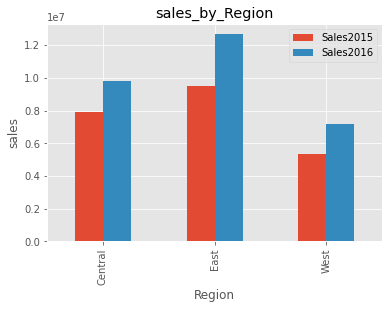

In [11]:
sale_by_reg.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('sales')
plt.title('sales_by_Region')

2. What are the contributing factors to the sales for each region in 2016. Visualize it using a 
Pie Chart.


Text(0.5, 1.0, 'Pie chart for salesfor each Region in 2016')

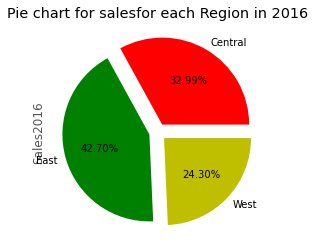

In [12]:
sales_2016 = sales.groupby('Region')['Sales2016'].sum()
sales_2016.plot(kind='pie', autopct='%0.2f%%',colors=['r','g','y'] ,explode=[0.1,0.1,0.1])
plt.title('Pie chart for salesfor each Region in 2016')

3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [13]:
sub_sales = sales.loc[:,['Region','Tier','Sales2015','Sales2016']]
sales_with_Reg_tier = sub_sales.pivot_table(index='Region', columns='Tier', values=['Sales2015','Sales2016'])
sales_with_Reg_tier

Sales2015                                            Sales2016  \
Tier            High          Low          Med          Out          High   
Region                                                                      
Central  6519.970693  3430.689709  5926.148610  5811.777857   8187.558342   
East     8224.994771  5094.157062  6041.559951  4663.318750  10535.244070   
West     5819.741621  3531.917789  5747.411104  3853.770000   7446.716107   

                                               
Tier             Low          Med         Out  
Region                                         
Central  4119.392182  7542.067253 -232.037857  
East     6468.528757  9059.045868    0.000000  
West     5786.853579  7833.273900    0.000000

Text(0.5, 1.0, 'Sales with respect to Region and Tier')

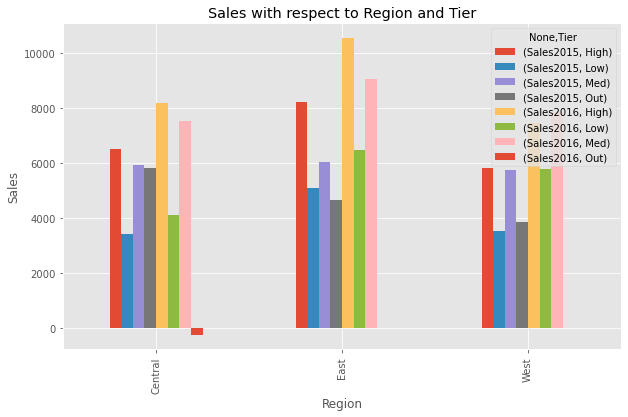

In [14]:
sales_with_Reg_tier.plot.bar(ylabel='Sales', figsize=(10,6))
plt.title('Sales with respect to Region and Tier')

4. In East region, which state registered a decline in 2016 as compared to 2015?

In [15]:
East_Reg = sales.loc[sales['Region']=='East',['State','Sales2015','Sales2016']]
East_Reg

,State,Sales2015,Sales2016
2,CT,0.00,6627.00
3,CT,19881.00,13254.00
4,MA,3684.48,0.00
5,ME,0.00,10525.24
6,ME,2631.31,42812.62
...,...,...,...
3682,MA,3128.34,3128.34
3695,FL,0.00,16163.05
3700,NY,7368.96,0.00
3704,NY,3684.48,0.00


<AxesSubplot:title={'center':'Sales in 2015 and 2016 by states'}, xlabel='State', ylabel='Sales'>

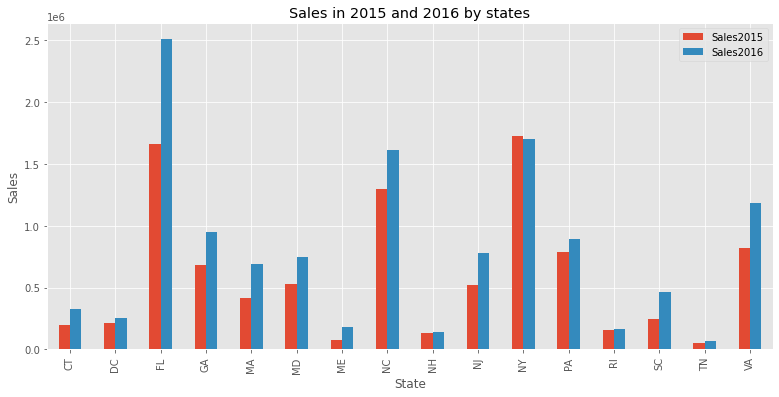

In [16]:
East_Reg.groupby('State')[['Sales2015','Sales2016']].sum().plot(kind='bar', figsize=(13,6), ylabel='Sales', title='Sales in 2015 and 2016 by states')

<AxesSubplot:title={'center':'Sales in 2015 and 2016 by states'}, xlabel='State', ylabel='Sales'>

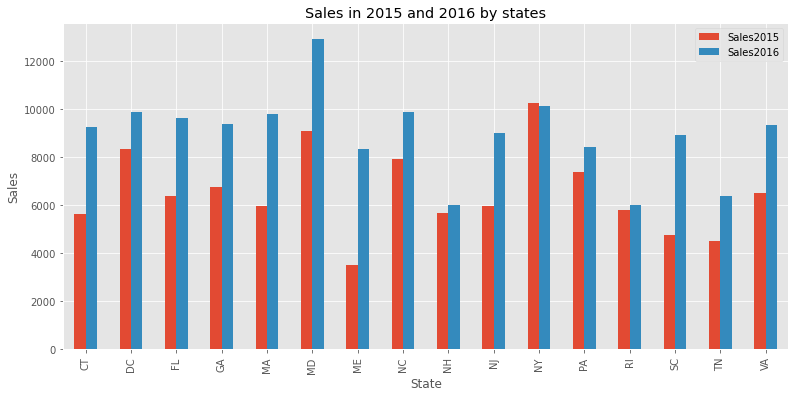

In [17]:
#or
East_Reg.pivot_table(index='State', values=['Sales2015','Sales2016']).plot(kind='bar', figsize=(13,6), ylabel='Sales', title=('Sales in 2015 and 2016 by states'))

In East region, NY state registered a decline in 2016 as compared to 2015

5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared 
to 2015?


In [18]:
High_tier = sales[['Division','Tier','Units2015','Units2016']].loc[sales['Tier']=='High',:]
High_tier2 = sales.groupby('Division')[['Units2015','Units2016']].sum()
High_tier2

,Units2015,Units2016
Division,,
BIG APPLE,297.8330,356.0000
CHARGERS,228.8333,312.4999
CONGRESSIONAL,306.5012,413.0006
DIAMONDBACK,303.5001,419.0001
EMPIRE,529.8335,563.3336
GRIDIRON,278.0006,340.1675
GULF STREAM,395.8333,624.3343
HAILSTORM,350.0003,456.1669
KINETIC,371.3334,434.5001


<AxesSubplot:xlabel='Division', ylabel='Sales'>

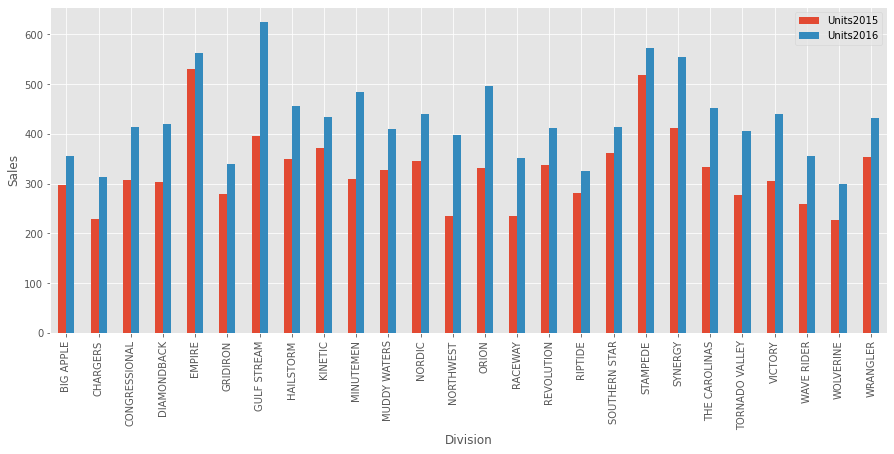

In [19]:
High_tier2.plot.bar(y=['Units2015','Units2016'], figsize=(15,6), ylabel='Sales')

In all the High tier, all Division saw a increase in number of units sold in 2016 compared to 2015

6. Create a new column Qtr using numpy.where() or any suitable utility in the imported 
dataset. The Quarters are based on months and defined as -

• Jan - Mar : Q1
    
• Apr - Jun : Q2
    
• Jul - Sep : Q3
    
• Oct - Dec : Q4

In [20]:
sales['Qtr'] = np.where(sales['Month'].isin(['Jan','Feb','Mar']),'Q1',np.where(sales['Month'].isin(['Apr','May','Jun']),'Q2',
                                                                            np.where(sales['Month'].isin(['Jul','Aug','Sep']),'Q3','Q4')))

In [21]:
sales.head(3)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2


7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

<AxesSubplot:title={'center':'Qtr wise sales'}, xlabel='Qtr', ylabel='Sales'>

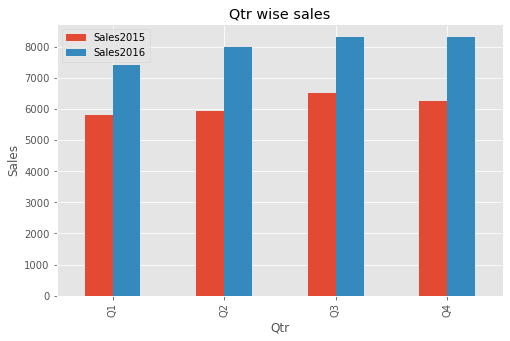

In [22]:
sales.pivot_table(index='Qtr', values=['Sales2015','Sales2016']).plot(kind='bar', figsize=(8,5), ylabel='Sales',title='Qtr wise sales')

8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a 
pie chart.

 (Draw 4 pie charts representing a Quarter for each Tier)


In [23]:
Qtr_sales = sales.pivot_table(index='Qtr', columns='Tier', values='Sales2016')
Qtr_sales

Tier,High,Low,Med,Out
Qtr,,,,
Q1,7974.677515,5516.469593,7654.041681,0.000000
Q2,8752.018136,5031.608757,8758.157542,0.000000
Q3,9334.404693,5446.422671,8197.976091,-360.947778
Q4,9386.142545,5052.104694,8307.596804,0.000000


In [24]:
Qtr_sales['Out'] = np.where(Qtr_sales['Out']=='-360.947778',Qtr_sales['Out'],0)
Qtr_sales

Tier,High,Low,Med,Out
Qtr,,,,
Q1,7974.677515,5516.469593,7654.041681,0.0
Q2,8752.018136,5031.608757,8758.157542,0.0
Q3,9334.404693,5446.422671,8197.976091,0.0
Q4,9386.142545,5052.104694,8307.596804,0.0


<AxesSubplot:title={'center':'Qtr1 sales'}, ylabel='Q1'>

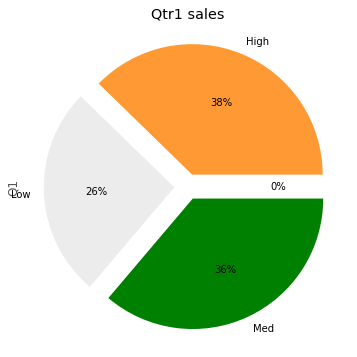

In [25]:
Qtr_sales.loc['Q1'].plot(kind='pie',labels=['High','Low','Med','Out'],figsize=(6,6), autopct='%1.0f%%',
                         explode = ([0.1,0.1,0.1,0.1]), colors=['#FF9933','#edecec','g','b'], title='Qtr1 sales')

<AxesSubplot:title={'center':'Qtr2 sales'}, ylabel='Q2'>

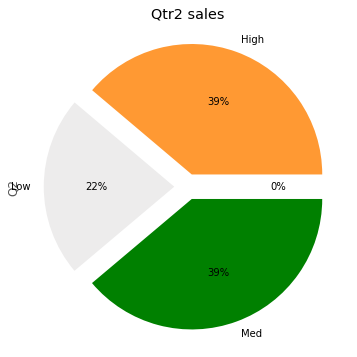

In [26]:
Qtr_sales.loc['Q2'].plot(kind='pie',labels=['High','Low','Med','Out'], autopct='%1.0f%%',
                         figsize=(6,6),explode = ([0.1,0.1,0.1,0.1]), colors=['#FF9933','#edecec','g','b'], title='Qtr2 sales')

<AxesSubplot:title={'center':'Qtr3 sales'}, ylabel='Q3'>

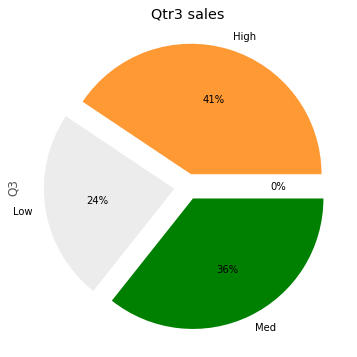

In [27]:
Qtr_sales.loc['Q3'].plot(kind='pie',labels=['High','Low','Med','Out'], autopct='%1.0f%%', colors=['#FF9933','#edecec','g','b'],figsize=(6,6),
                         explode = ([0.1,0.1,0.1,0.1]),title=('Qtr3 sales'))

<AxesSubplot:title={'center':'Qtr4 sales'}, ylabel='Q4'>

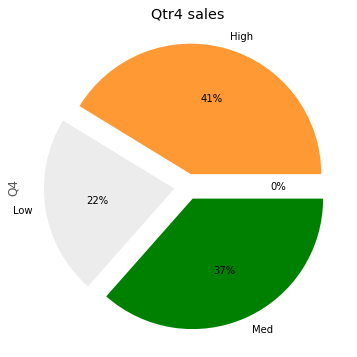

In [28]:
Qtr_sales.loc['Q4'].plot(kind='pie',labels=['High','Low','Med','Out'], autopct='%1.0f%%',figsize=(6,6),
                         explode = ([0.1,0.1,0.1,0.1]), colors=['#FF9933','#edecec','g','b'], title=('Qtr4 sales'))